<a href="https://colab.research.google.com/github/VOL-EM2024/mo/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("/content/OnlineRetail.csv", encoding='ISO-8859-1')
df # чтение файла


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
468242,576405,22940,FELTCRAFT CHRISTMAS FAIRY,6.0,15-11-2011 11:14,4.25,13735.0,United Kingdom
468243,576405,21914,BLUE HARMONICA IN BOX,3.0,15-11-2011 11:14,1.25,13735.0,United Kingdom
468244,576405,21915,RED HARMONICA IN BOX,3.0,15-11-2011 11:14,1.25,13735.0,United Kingdom
468245,576405,23301,GARDENERS KNEELING PAD KEEP CALM,5.0,15-11-2011 11:14,1.65,13735.0,United Kingdom


In [2]:
from numpy import nan

def convert_to_float(df, column_name):
    df[column_name] = df[column_name].astype(str).str.replace('[^0-9.]', '', regex=True).replace('', nan).astype(float)
    return df[column_name]

df['Quantity'] = convert_to_float(df, 'Quantity')
df['UnitPrice'] = convert_to_float(df, 'UnitPrice')
df['InvoiceNo'] = convert_to_float(df, 'InvoiceNo')

Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [ ]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки
"""

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468247 entries, 0 to 468246
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    468247 non-null  float64
 1   StockCode    468247 non-null  object 
 2   Description  466860 non-null  object 
 3   Quantity     468246 non-null  float64
 4   InvoiceDate  468246 non-null  object 
 5   UnitPrice    468246 non-null  float64
 6   CustomerID   353202 non-null  float64
 7   Country      468246 non-null  object 
dtypes: float64(4), object(4)
memory usage: 28.6+ MB


колонка "CustomerID" выделяется, поэтому мы удаляем его

In [4]:
df = df.drop(columns = ['CustomerID'])
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01-12-2010 08:26,2.55,United Kingdom
1,536365.0,71053,WHITE METAL LANTERN,6.0,01-12-2010 08:26,3.39,United Kingdom
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,01-12-2010 08:26,2.75,United Kingdom
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01-12-2010 08:26,3.39,United Kingdom
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,01-12-2010 08:26,3.39,United Kingdom
...,...,...,...,...,...,...,...
468242,576405.0,22940,FELTCRAFT CHRISTMAS FAIRY,6.0,15-11-2011 11:14,4.25,United Kingdom
468243,576405.0,21914,BLUE HARMONICA IN BOX,3.0,15-11-2011 11:14,1.25,United Kingdom
468244,576405.0,21915,RED HARMONICA IN BOX,3.0,15-11-2011 11:14,1.25,United Kingdom
468245,576405.0,23301,GARDENERS KNEELING PAD KEEP CALM,5.0,15-11-2011 11:14,1.65,United Kingdom


<Axes: >

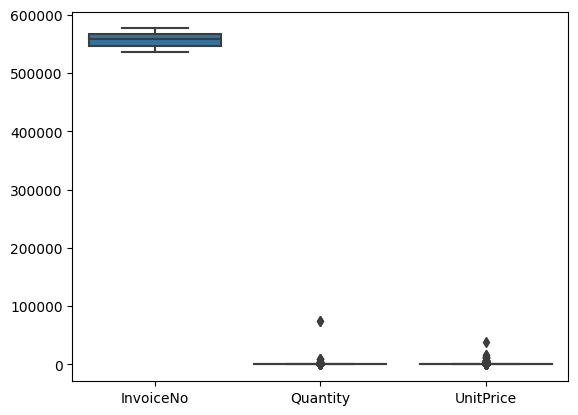

In [5]:
sns.boxplot(df)

 Выбросы есть, поэтому их нужно удалить

In [6]:
!pip install detectorusoutlierus==0.0.1b0


In [7]:
from detectorusoutlierus import outliers as do


In [8]:
#Методом среднего
outlier_detector = do.Outline(df)
columns = ['Quantity', 'UnitPrice', 'InvoiceNo']
for col in columns:
    outliers_kvart = outlier_detector.detect_outlier_mean_std(col)
    df = pd.concat([df, outliers_kvart, outliers_kvart]).drop_duplicates(keep=False)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01-12-2010 08:26,2.55,United Kingdom
1,536365.0,71053,WHITE METAL LANTERN,6.0,01-12-2010 08:26,3.39,United Kingdom
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,01-12-2010 08:26,2.75,United Kingdom
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01-12-2010 08:26,3.39,United Kingdom
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,01-12-2010 08:26,3.39,United Kingdom
...,...,...,...,...,...,...,...
445122,574777.0,21809,CHRISTMAS HANGING TREE WITH BELL,48.0,07-11-2011 10:23,0.39,United Kingdom
445123,574777.0,21818,GLITTER HEART DECORATION,36.0,07-11-2011 10:23,0.39,United Kingdom
445124,574777.0,21810,CHRISTMAS HANGING STAR WITH BELL,48.0,07-11-2011 10:23,0.39,United Kingdom
445125,574777.0,21811,HANGING HEART WITH BELL,48.0,07-11-2011 10:23,0.39,United Kingdom


<Axes: >

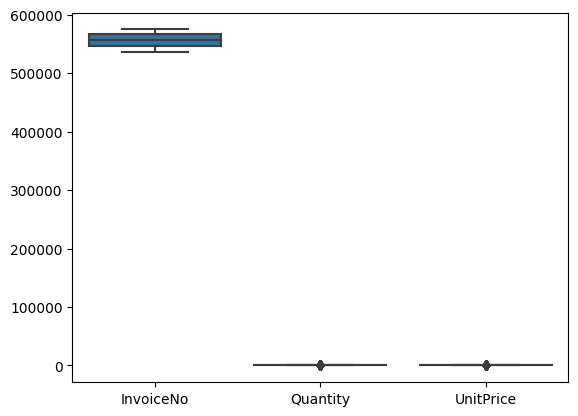

In [9]:
sns.boxplot(df)

убрали выбросы)

In [12]:
df_cluster = df.copy()

array([[<Axes: title={'center': 'InvoiceNo'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'UnitPrice'}>, <Axes: >]], dtype=object)

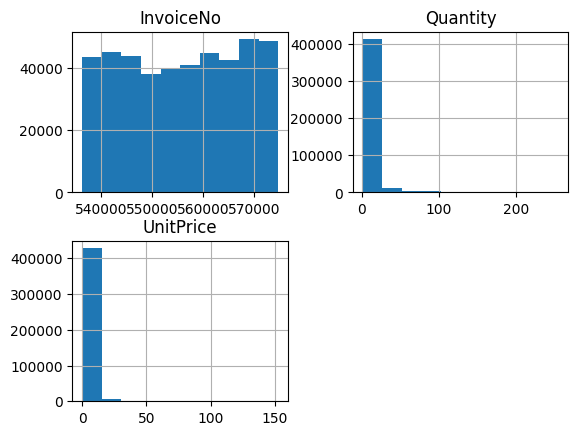

In [13]:
df_cluster.hist()

In [ ]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""

In [14]:
# Создаем экземпляр модели K-Means
kmeans = KMeans(n_clusters=4)

# Производим кластеризацию данных
kmeans.fit(X)

# Получаем центры кластеров и прогнозируем принадлежность к кластерам
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_


NameError: ignored

In [15]:
# Визуализируем результаты кластеризации
plt.scatter(df["Damage Taken"], df["Damage to Players"], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('Damage Taken')
plt.ylabel('Damage to Players')
plt.title('Результаты кластеризации K-Means')
plt.show()

KeyError: ignored

In [ ]:
print(cluster_centers) # центры кластеров в двумерном пространстве

In [ ]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь иерархическая кластеризация и метрики
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
!pip install ydata-profiling

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [ ]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



In [ ]:
# your_code here